In [1]:
import numpy as np
n = 1000
x = np.linspace(-3,3,n)
y = np.log(abs(x**2-1)+0.5)
x += np.random.normal(scale=0.1,size=n)

In [8]:
def radial_reg(x,x0,tau):
    return np.exp(np.sum( (x-x0)**2,axis=1 )/(-2*tau*tau))

def locally_weighted_reg(x0,x,y,tau):
    x0 = np.r_[1,x0]
    x = np.c_[np.ones(len(x)),x]
    xw = x.T*radial_reg(x,x0,tau)
    beta = np.linalg.pinv(xw@x)@xw@y
    return x0@beta

In [6]:
domain = np.linspace(-3,3,300)
def plot_lwr(tau):
    p = [locally_weighted_reg(x0,x,y,tau) for x0 in domain]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(20,20))
    plt.subplot(2,2,1)
    plt.scatter(x,y,alpha=0.3)
    plt.plot(domain,p,color='red')
    return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


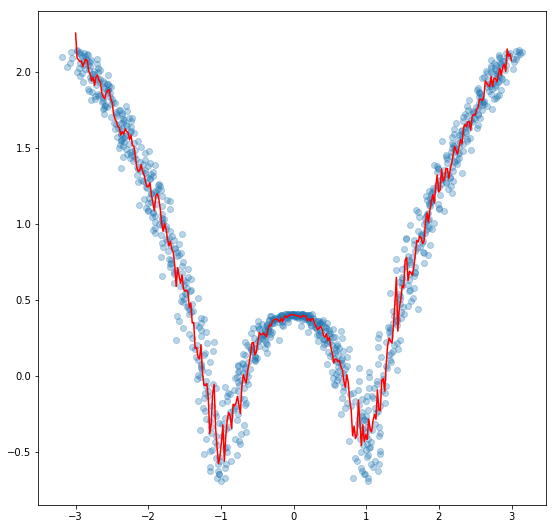

In [10]:
print(plot_lwr(0.01))